In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression



In [3]:
df_wine = pd.read_csv('WineQT.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df_wine.shape

(1143, 13)

In [6]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [10]:
#Defining target value and indepentdent variables

In [12]:
x = df_wine.drop(columns = 'quality')
y = df_wine['quality']
y_max = max(df_wine['quality'])
print(y_max)



8


In [13]:
#Deleting outliers

In [14]:
# import libaries
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest

In [27]:
outlier_detector = IsolationForest(contamination=0.03)
outlier_detector.fit(x)
outliers = outlier_detector.predict(x)

x_clean = x[outliers == 1]
y_clean = y[outliers == 1]

C:\Users\TEJASWINIVILASAGARAM\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [16]:
#Spliting data

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print("Done")

Done


In [18]:
#Training the model

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Done")

Done


In [30]:
c = model.intercept_
m = model.coef_
print(c)
print(m)

26.598098704414674
[ 6.30483790e-03 -1.06930207e+00 -1.57169671e-01  4.79028137e-03
 -1.43352673e+00  3.61586422e-03 -3.40721035e-03 -2.19340877e+01
 -5.28942705e-01  1.04011547e+00  2.68578831e-01 -4.06975813e-05]


In [31]:
y_pred_train = model.predict(x_train)
print("Done")

Done


RESULT WITH TRAINED DATA
Number of data train:  800


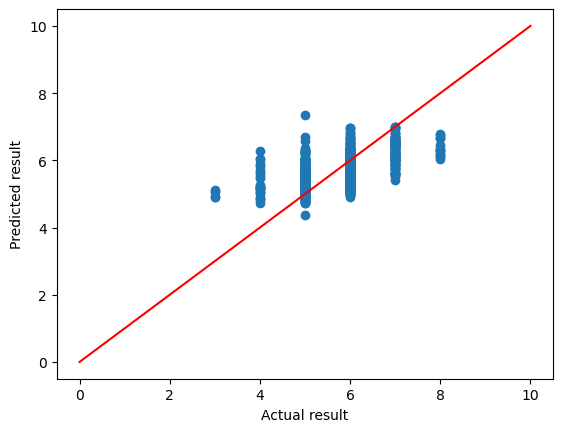

In [26]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual result")
plt.ylabel("Predicted result")
x_point = np.array([0,10])
y_point = np.array([0,10])
# max value of y is around 13 million
plt.plot(x_point, y_point, c = 'r')
print("RESULT WITH TRAINED DATA")
print("Number of data train: ", len(x_train))
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2_score_without_test = r2_score(y_train, y_pred_train)
print(r2_score_without_test)

0.359117360468604


In [33]:
#Test the model with tested data

In [34]:
y_pred_test = model.predict(x_test)
print("Done")

Done


RESULT WITH TESTED DATA
Number of data test:  343


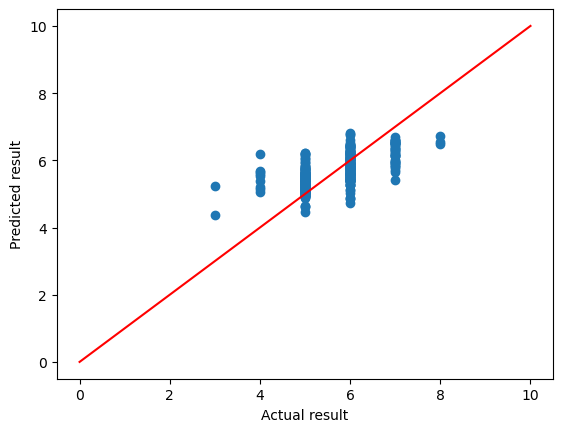

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual result")
plt.ylabel("Predicted result")
x_point = np.array([0,10])
y_point = np.array([0,10])
plt.plot(x_point, y_point, c = 'r')
print("RESULT WITH TESTED DATA")
print("Number of data test: ", len(x_test))
plt.show()

In [37]:
# Testing Dataset Result

In [38]:
from sklearn.metrics import r2_score
r2_score_with_test = r2_score(y_test, y_pred_test)
print(r2_score_with_test)

0.39937911027288353
